# Medical Cost Personal Datasets
## Insurance Forecast by using Linear Regression

### Problem Statement:
The given data set consist of information of the medical costs billed by the health insurance for the population in US. With the given data identify the patterns hiden in the data set and check if a Linear regression model could be fit for the data to predcit the target variable 'Charges'.

In [53]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Setting the visual preferances
plt.style.use('dark_background')
%matplotlib inline

## EDA: Exploratory Data Analysis
## Task 1: Data Preparation
- ### Subtask 1.1: Import and read

In [135]:
# Reading the data_set 'insurance' as df
df = pd.read_csv('C:/demo/Use_Cases/Medical_Insurance/insurance.csv')

In [136]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- ### Subtask 1.2: Inspection of data

In [137]:
df.shape

(1338, 7)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
round(df.isnull().sum()/len(df.index)*100,2)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

##### Explanation: 
There are total of 1,338 rows with 7 columns having 1 dependent variable ('Charges') and 6 independent variables. There are no missing values in the data set.

- ### Subtask 1.3: Detection of outliers

In [140]:
# Creating a sub list of numeric variables to read stats summary.
num = ['age', 'bmi', 'children', 'charges']
df[num].describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


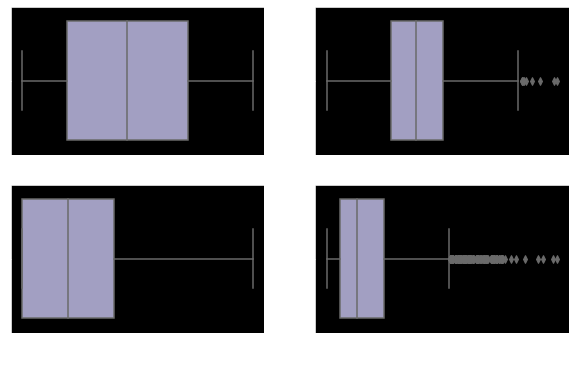

In [141]:
# Creating the box plots to identify outliers.
plt.figure(figsize = (10,6))
for x in enumerate(num):
    plt.subplot(2,2,x[0]+1)
    sns.boxplot(x = x[1], data = df, palette = 'Purples')

##### Explanation:
From the above graph it is clear that the columns 'bmi' and 'charges' have outliers.

- ### Subtask 1.4: Treatment of Outliers.
-- BMI column

In [142]:
df['bmi'].quantile([0.25,0.50,0.75,0.90,0.95,0.99]).round(2)

0.25    26.30
0.50    30.40
0.75    34.69
0.90    38.62
0.95    41.11
0.99    46.41
Name: bmi, dtype: float64

In [143]:
bmi = df.loc[df['bmi']> df['bmi'].quantile(0.95),]

In [145]:
bmi['bmi'].describe().round(2)

count    67.00
mean     44.05
std       2.74
min      41.14
25%      41.91
50%      43.01
75%      45.72
max      53.13
Name: bmi, dtype: float64

In [67]:
bmi.loc[bmi['bmi']>45].describe().round(2)

,age,bmi,children,charges
count,20.00,20.00,20.00,20.00
mean,39.45,47.55,1.45,17547.93
std,12.59,2.20,1.19,19001.82
min,18.00,45.32,0.00,1163.46
25%,26.75,46.17,1.00,5938.80
50%,41.00,46.72,1.00,9491.25
75%,50.50,47.82,2.00,19972.46
max,58.00,53.13,5.00,63770.43


In [68]:
# Removing data sets which has bmi > 45
df = df.loc[df['bmi']<= 45, :]

In [69]:
# Caping of bmi outliers to 95th percentile.
df.loc[df['bmi']> df['bmi'].quantile(0.95), ['bmi']] = df['bmi'].quantile(0.95)

##### Explanation:
- The BMI column had a total outliers of 67 rows out of which 20 rows had extreem outliers having bmi > 45. There is no point in treating dis outliers, hence they were removed. 
- The remaining 40 rows were capped to the 95th percentile. (bmi = 41.1)

-- Charges column

In [70]:
print(df['charges'].describe([0.25,0.50,0.75,0.90,0.95,0.08,0.99]).round(2))

count     1318.00
mean     13205.51
std      11974.49
min       1121.87
8%        2137.80
25%       4740.29
50%       9369.62
75%      16639.91
90%      34704.39
95%      40933.76
99%      48459.05
max      62592.87
Name: charges, dtype: float64


In [71]:
charges = df.loc[df['charges']> df['charges'].quantile(0.95), :]

In [72]:
charges.describe().round(2)

,age,bmi,children,charges
count,66.00,66.00,66.00,66.00
mean,51.17,35.71,1.24,46104.55
std,9.25,3.09,1.11,4336.23
min,28.00,30.21,0.00,40941.29
25%,45.25,33.24,0.00,42973.25
50%,51.50,35.92,1.00,45706.12
75%,59.75,38.06,2.00,47796.72
max,64.00,40.20,3.00,62592.87


In [73]:
# removing the data sets which have charges > 95th percentile.
df = df.loc[df['charges']<= df['charges'].quantile(0.95), :]

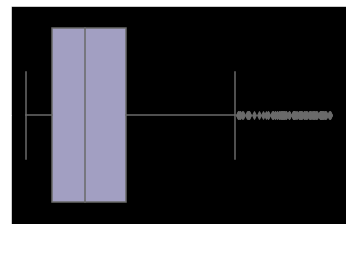

In [74]:
sns.boxplot(x = df['charges'], palette = 'Purples')
plt.show()

In [75]:
df.loc[df['charges'] > df['charges'].quantile(0.95), ['charges']] = df['charges'].quantile(0.95)

##### Explanation:
- The extreem outliers having charges > 40,000 were removed. (68 rows)
- The remaining outliers were capped to 95th percentile.

- ### Subtask 1.5: Variable Conversion 

In [77]:
df['sex'].replace(['female', 'male'], [0,1], inplace = True)
df['smoker'].replace(['no', 'yes'], [0,1], inplace = True)

##### Explanation:
- All the females have been converted to 0 and males have been converted to 1.
- In the smokers column yes has been converted into 1 and no has been converted into 0.

## Task 2: Data Visualization
- ### Subtask 2.1: Tabular Analysis

In [76]:
# Finding the average
df.describe().round(2)

,age,bmi,children,charges
count,1252.00,1252.00,1252.00,1252.00
mean,38.57,30.03,1.08,11312.28
std,14.01,5.55,1.21,9042.14
min,18.00,15.96,0.00,1121.87
25%,26.00,25.90,0.00,4534.56
50%,38.00,29.92,1.00,8824.54
75%,51.00,34.03,2.00,14152.41
max,64.00,40.20,5.00,34833.25


##### Explanation:
- The avg age of a person incuring a medical cost is 38 years.
- The avg charge of an health insurance is $11,312.

In [79]:
region = df.groupby('region')

In [85]:
pd.DataFrame(region.age.mean().sort_values()).round()

,age
region,
southeast,38.0
northeast,39.0
northwest,39.0
southwest,39.0


In [84]:
# Average BMI of a person from each region.
pd.DataFrame(region.bmi.mean().sort_values()).round(2)

,bmi
region,
northeast,28.78
northwest,28.97
southwest,30.21
southeast,32.13


In [110]:
# Identifying total no of smokers from each region
pd.DataFrame(region.smoker.sum().sort_values())

,smoker
region,
northwest,46
southwest,46
northeast,53
southeast,58


In [89]:
# Finding the average no of kids in each region.
pd.DataFrame(region.children.mean().sort_values()).round()

,children
region,
southeast,1.0
northeast,1.0
northwest,1.0
southwest,1.0


In [94]:
# Identifying no of senior citizens in each region.
pd.DataFrame(df.loc[df['age']>62, ].groupby('region')['age'].count())

,age
region,
northeast,9
northwest,11
southeast,11
southwest,7


- ### Subtask 2.2: Univariate Analysis.

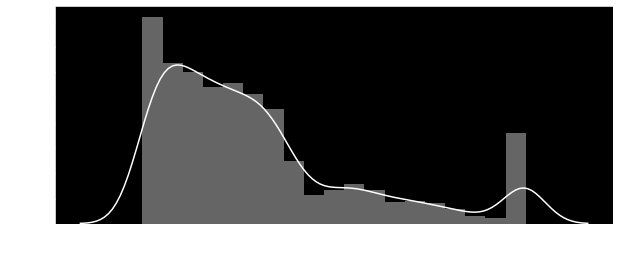

In [120]:
plt.figure(figsize = (10,4))
sns.distplot(df['charges'], color = 'w')
plt.show()

In [103]:
df['charges'].describe()

count     1252.000000
mean     11312.282913
std       9042.138902
min       1121.873900
25%       4534.563500
50%       8824.535875
75%      14152.412300
max      34833.252550
Name: charges, dtype: float64

##### Explanation:
Majority of the the health plan ranges from 1,121 to 15,000. 

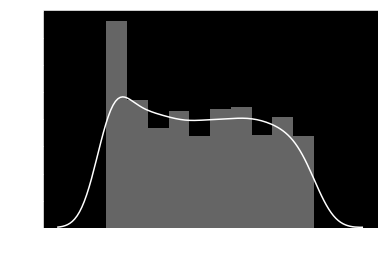

In [119]:
sns.distplot(df['age'], color = 'w')
plt.show()

##### Explanation:
The variance of the column age is distributed equaly towards all the age group. However we can see a little spike in the age group of 18 to 25.

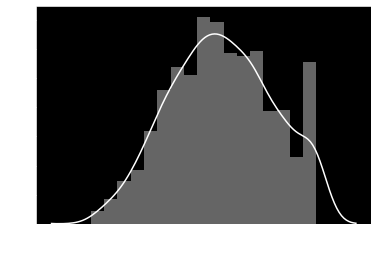

In [118]:
sns.distplot(df['bmi'], color = 'w')
plt.show()

##### Explanation:
The maximum number of people have the bmi within the range 27 to 33.

- ### Subtask 2.3: Bivariate Analysis

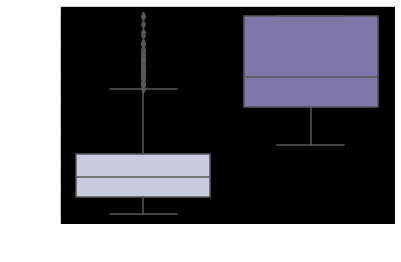

In [121]:
sns.boxplot(x = df['smoker'], y = df['charges'], palette = 'Purples')
plt.show()

##### Explanation:
Clearly the population who are smokers have higher cost for medical insurance. 

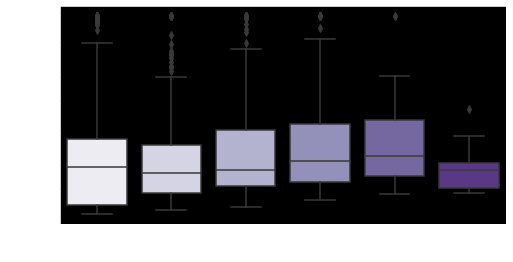

In [124]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['children'], y = df['charges'], palette = 'Purples')
plt.show()

##### Explanation:
The cost of the insurance is not affected by the number of childerns as all of them have 50th percentile around 10,000.

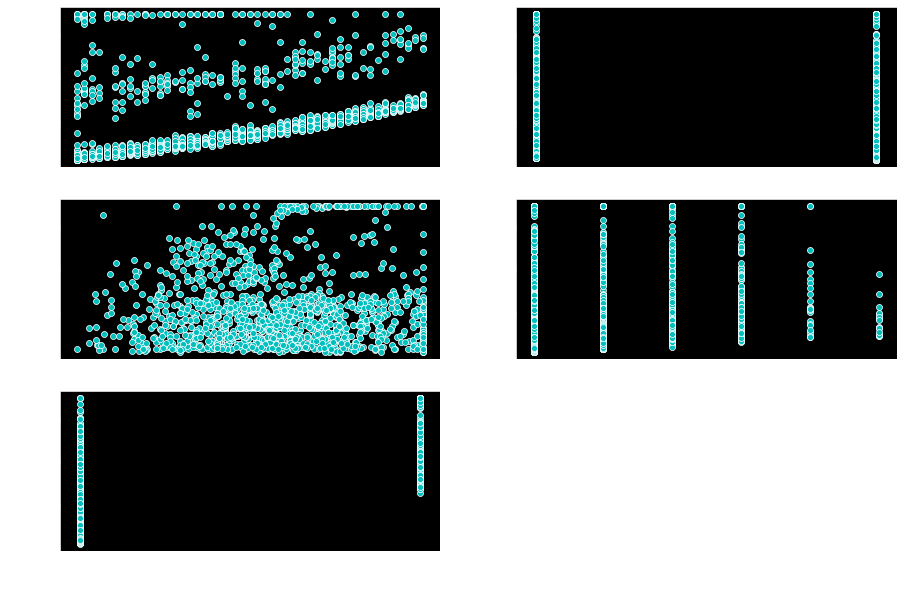

In [131]:
var = ['age', 'sex', 'bmi', 'children', 'smoker']
plt.figure(figsize = (15,10))
for x in enumerate(var):
    plt.subplot(3,2,x[0]+1)
    sns.scatterplot(x = x[1], y = 'charges', data = df, color = 'c')
plt.show()

In [134]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.028728,0.085767,0.044222,-0.129282,0.259673
sex,-0.028728,1.000000,0.027998,0.010888,0.064953,0.038762
bmi,0.085767,0.027998,1.000000,-0.011477,-0.119609,0.068721
children,0.044222,0.010888,-0.011477,1.000000,-0.002756,0.072551
smoker,-0.129282,0.064953,-0.119609,-0.002756,1.000000,0.720527
charges,0.259673,0.038762,0.068721,0.072551,0.720527,1.000000


#### Final Conclusion:
- There is absolutely no linear relationship between dependent and independent variables and hence since it doesnt satisfy the 1st condition of linearity, the linear resgression model cannot be fit to the data set.
-------------------------------------------------------------------------------------------------------
- The correlation between the dependent and independent variables are not strong, except for the variable 'smoker' and 'age'. Since other variables are not contributing much for the determination of  the price factor, We need few more variables to determine/predict the charges.